# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [78]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [79]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [80]:
# Read the census data into a Pandas DataFrame
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [81]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_mean = sfo_data.groupby(['year','housing_units']).mean()
sfo_mean

sale_price_sqr_foot  gross_rent
year housing_units                                 
2010 372560                  369.344353        1239
2011 374507                  341.903429        1530
2012 376454                  399.389968        2324
2013 378401                  483.600304        2971
2014 380348                  556.277273        3528
2015 382295                  632.540352        3739
2016 384242                  697.643709        4390

In [82]:
# Save the dataframe as a csv file
sfo_mean.to_csv('sfo_mean.csv',  index=True)

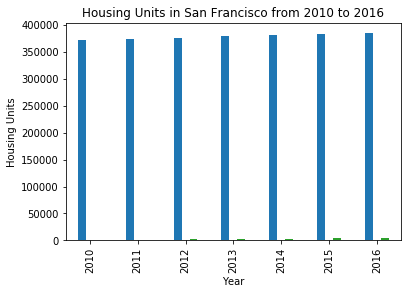

In [83]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

file_path = Path("sfo_mean.csv")
sfo_data2 = pd.read_csv(file_path, index_col='year')
sfo_data2.head()


sfo_data2.plot(kind='bar',  xlabel='Year', 
               ylabel='Housing Units' , rot=90,  
               title='Housing Units in San Francisco from 2010 to 2016', 
               legend=False)



# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [84]:
# Calculate the average sale price per square foot and average gross rent
sfo_data.groupby(['year'])['sale_price_sqr_foot','gross_rent'].mean()

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

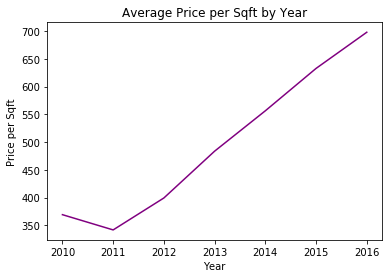

In [85]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
sale_price_sqr_foot = sfo_data.groupby(['year'])['sale_price_sqr_foot'].mean()
sale_price_sqr_foot

sale_price_sqr_foot.plot(kind='line',  xlabel='Year', 
               ylabel='Price per Sqft', color='purple',   
               title='Average Price per Sqft by Year', 
               legend=False)


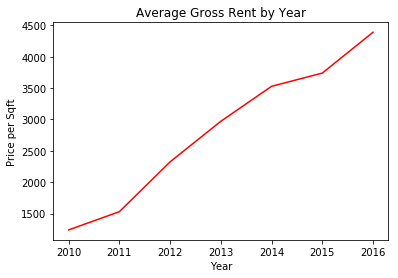

In [86]:
# Line chart for average montly rent
gross_rent = sfo_data.groupby(['year'])['gross_rent'].mean()
gross_rent

gross_rent.plot(kind='line',  xlabel='Year', 
               ylabel='Price per Sqft', color='red',   
               title='Average Gross Rent by Year', 
               legend=False)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [87]:
# Group by year and neighborhood and then create a new dataframe of the mean values
hood_mean = sfo_data.groupby(['year','neighborhood'])['sale_price_sqr_foot','gross_rent'].mean()
hood_mean


sale_price_sqr_foot  gross_rent
year neighborhood                                           
2010 Alamo Square                     291.182945        1239
     Anza Vista                       267.932583        1239
     Bayview                          170.098665        1239
     Buena Vista Park                 347.394919        1239
     Central Richmond                 319.027623        1239
...                                          ...         ...
2016 Telegraph Hill                   903.049771        4390
     Twin Peaks                       970.085470        4390
     Van Ness/ Civic Center           552.602567        4390
     Visitacion Valley                328.319007        4390
     Westwood Park                    631.195426        4390

[397 rows x 2 columns]

In [88]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# hood_mean.hvplot.line()
avg_price = hood_mean.hvplot.line(x='year',xlabel='Year', y='sale_price_sqr_foot',
                      ylabel='Avg Sales Price per Square Foot', width=600, 
                         groupby='neighborhood')
avg_price

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [89]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
avg_rent = hood_mean.hvplot.line(x='year',xlabel='Year', y='gross_rent',
                      ylabel='Avg Gross Rent per Year', width=600, 
                         groupby='neighborhood')
avg_rent

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [90]:
# Getting the data from the top 10 expensive neighborhoods to own
top_hood = sfo_data.groupby(['neighborhood'])['sale_price_sqr_foot', 'gross_rent','housing_units'].mean().nlargest(10, 'sale_price_sqr_foot').sort_values(by='sale_price_sqr_foot',ascending=False)
top_hood


sale_price_sqr_foot   gross_rent  housing_units
neighborhood                                                          
Union Square District           903.993258  2555.166667      377427.50
Merced Heights                  788.844818  3414.000000      380348.00
Miraloma Park                   779.810842  2155.250000      375967.25
Pacific Heights                 689.555817  2817.285714      378401.00
Westwood Park                   687.087575  3959.000000      382295.00
Telegraph Hill                  676.506578  2817.285714      378401.00
Presidio Heights                675.350212  2817.285714      378401.00
Cow Hollow                      665.964042  2817.285714      378401.00
Potrero Hill                    662.013613  2817.285714      378401.00
South Beach                     650.124479  2099.000000      375805.00

In [91]:
# Plotting the data from the top 10 expensive neighborhoods
top_hood.hvplot.bar(x ='neighborhood',xlabel='neighborhood', y='sale_price_sqr_foot',
                      ylabel='Avg Sales Price per Square Foot', height=500, width=600, rot=90
                         ).sort(['sale_price_sqr_foot'],reverse=True)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [105]:
hood_mean = sfo_data.groupby(['year','neighborhood'])['sale_price_sqr_foot','gross_rent','housing_units'].mean().sort_values(by='gross_rent',ascending=True)
hood_mean

sale_price_sqr_foot  gross_rent  housing_units
year neighborhood                                                   
2010 Alamo Square              291.182945        1239         372560
     Mission Bay               489.805378        1239         372560
     Mission Dolores           257.987999        1239         372560
     Mission Terrace           262.876026        1239         372560
     Nob Hill                  307.677477        1239         372560
...                                   ...         ...            ...
2016 Inner Parkside            518.112650        4390         384242
     Inner Richmond            403.311132        4390         384242
     Inner Sunset              445.923828        4390         384242
     Excelsior                 534.226250        4390         384242
     Westwood Park             631.195426        4390         384242

[397 rows x 3 columns]

In [108]:
# Plotting the data from the top 10 expensive neighborhoods
stack_hood = hood_mean.hvplot.bar(stacked=False,  x='year', xlabel='Neighborhood', y=['sale_price_sqr_foot','gross_rent'], 
                                  value_label='Num Housing Units', height=400,
                        
                          groupby='neighborhood', rot=90)
stack_hood

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (Num Housing Units)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [109]:
# Load neighborhoods coordinates data
file_path = Path("neighborhoods_coordinates.csv")
neighborhood_data = pd.read_csv(file_path)
neighborhood_data.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [115]:
# Calculate the mean values for each neighborhood
map_mean = sfo_data.groupby(['neighborhood'])['sale_price_sqr_foot','housing_units','gross_rent'].mean().reset_index()
map_mean.head()

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0     Alamo Square           366.020712       378401.0  2817.285714
1       Anza Vista           373.382198       379050.0  3031.833333
2          Bayview           204.588623       376454.0  2318.400000
3  Bayview Heights           590.792839       382295.0  3739.000000
4  Bernal Heights            576.746488       379374.5  3080.333333

In [121]:
# Join the average values with the neighborhood locations
map_data = pd.concat([map_mean, neighborhood_data], axis='columns', join='inner')
map_data.head()

neighborhood  sale_price_sqr_foot  housing_units   gross_rent  \
0     Alamo Square           366.020712       378401.0  2817.285714   
1       Anza Vista           373.382198       379050.0  3031.833333   
2          Bayview           204.588623       376454.0  2318.400000   
3  Bayview Heights           590.792839       382295.0  3739.000000   
4  Bernal Heights            576.746488       379374.5  3080.333333   

      Neighborhood        Lat         Lon  
0     Alamo Square  37.791012 -122.402100  
1       Anza Vista  37.779598 -122.443451  
2          Bayview  37.734670 -122.401060  
3  Bayview Heights  37.728740 -122.410980  
4   Bernal Heights  37.728630 -122.443050

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

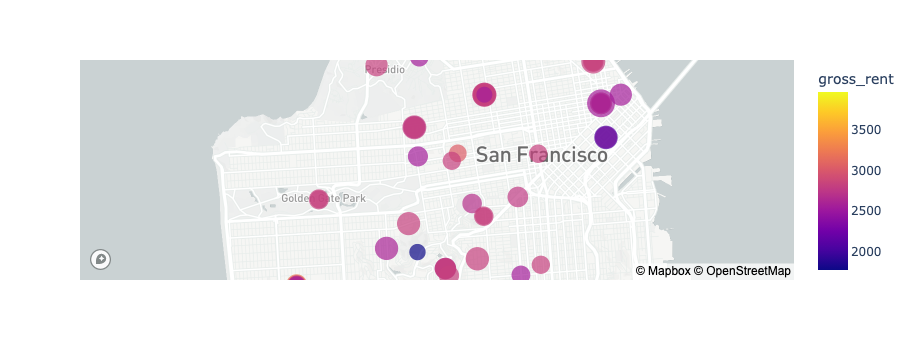

In [135]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    map_data,
    lat="Lat",
    lon="Lon",
     size="sale_price_sqr_foot",
     color="gross_rent",
      zoom=10
)

# Display the map
map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [ ]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


In [ ]:
# Parallel Categories Plot
# YOUR CODE HERE!

In [ ]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [ ]:
# Sunburst Plot
# YOUR CODE HERE!